# Importing

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df=pd.read_csv("C:/Users/HP/Desktop/Hacktoberfest/ML-Hub/Data Science Job Salaries/Dataset/ds_salaries.csv")

In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


# Data Outline

* Salary histplot

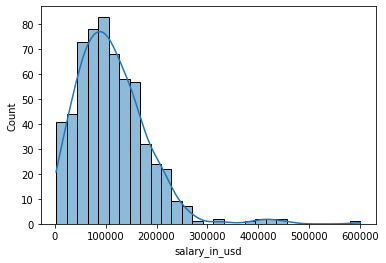

In [7]:
sns.histplot(data=df, x="salary_in_usd",kde=True);

A histogram is right skewed. This kind of distribution has a large number of occurrences in the lower value cells (left side) and few in the upper value cells (right side). In this case, there are a large number of occurences around 100,000.

* Salary piechart by work_year

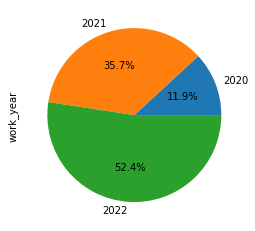

In [8]:
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

More than 50% of data are in 2022.

* Salary boxplot by work_year

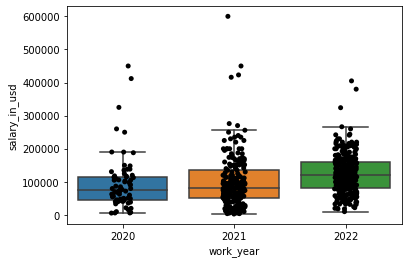

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='work_year', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='work_year', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

The median has been getting higher by year.

* Salary histplot by work_year

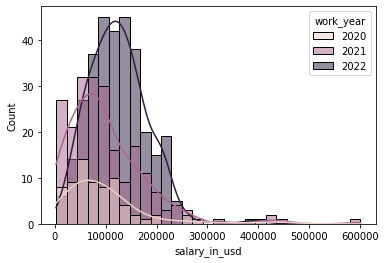

In [10]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='work_year');

The right skewed is outstanding in 2020. And it has been shifting to a little left side in 2022.

* Salary piechart by experience_level

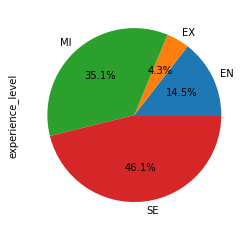

In [11]:
df.groupby('experience_level')['experience_level'].count().plot.pie(autopct="%1.1f%%");

Senior level occupies 46.1%. And Mid level occupies 35.1%.

* Salary boxplot by experience_level

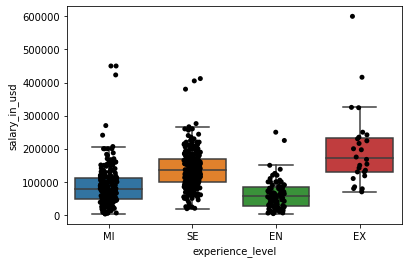

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='experience_level', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

It is understandable that the median of levels are EN < MI < SE < EX in salary.

* Salary histplot by experience_level

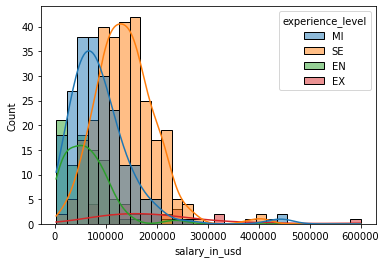

In [13]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='experience_level');

The trend of 4 experience level are right skewed.

* Salary piechart by employment_type

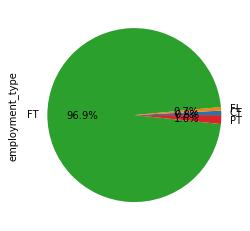

In [14]:
df.groupby('employment_type')['employment_type'].count().plot.pie(autopct="%1.1f%%");

Full time occupies 96.0%.

* Salary boxplot by empolyment_type

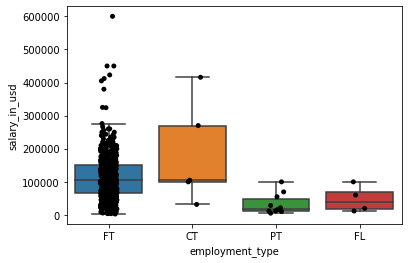

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='employment_type', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

Median of full time and contractor seem to be same. But salary of contractor have very wide range and inclides some very high salary. It may depends on their skills..

* Salary histplot by employment_type

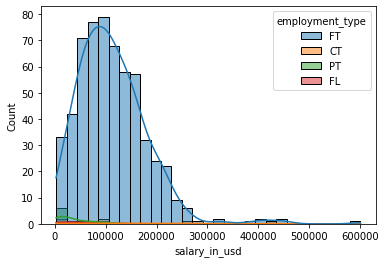

In [16]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='employment_type');

The trend of full time are right skewed.

* Salary barchart by job_title

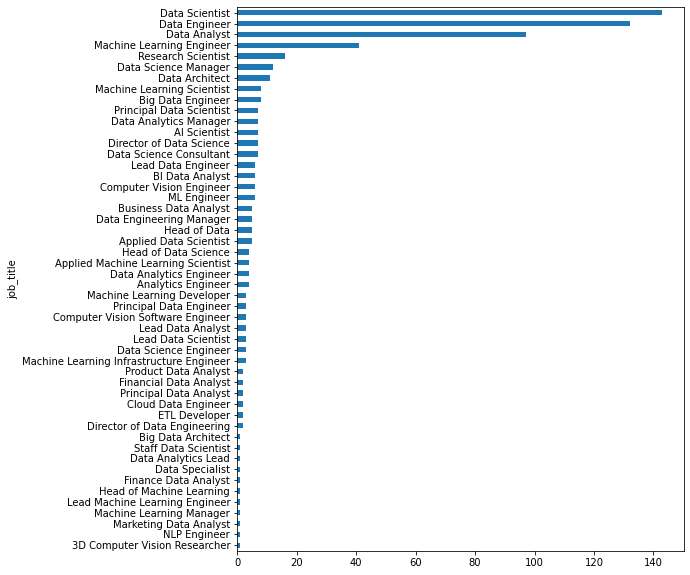

In [17]:
df.groupby('job_title')['job_title'].count().sort_values(ascending=True).plot.barh(figsize=(8,10));

Data scientist, data engineer and data analyst are top 3 job titles. And machine learning engneer and research scientist are following them.

* Salary boxplot by job_title

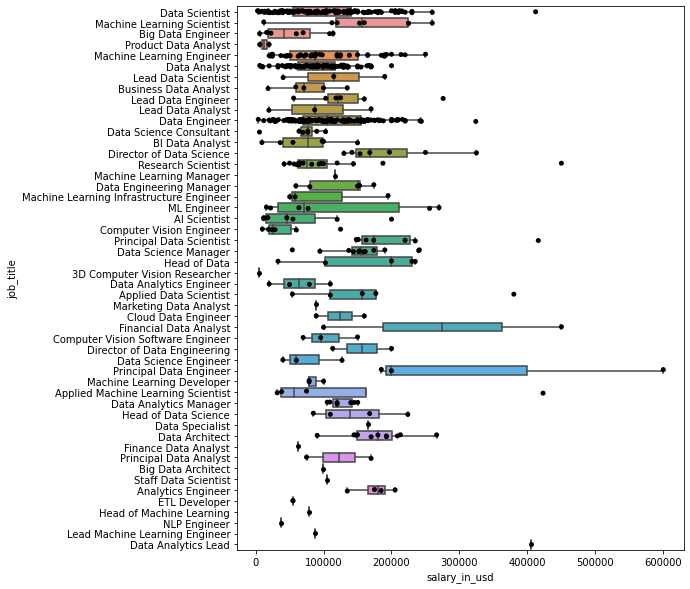

In [18]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='job_title', x='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(y='job_title', x='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

There are a lot of job titles and range of salary. It may show that job title and salary do not have so strong correlation.

* Salary barchart by employee_residence

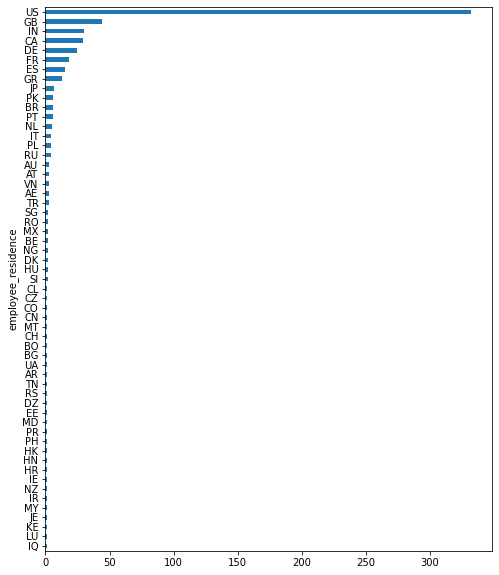

In [19]:
df.groupby('employee_residence')['employee_residence'].count().sort_values(ascending=True).plot.barh(figsize=(8,10));

The number of people who live in the U.S is overwhelmingly. 

* Salary boxplot by employee_residence

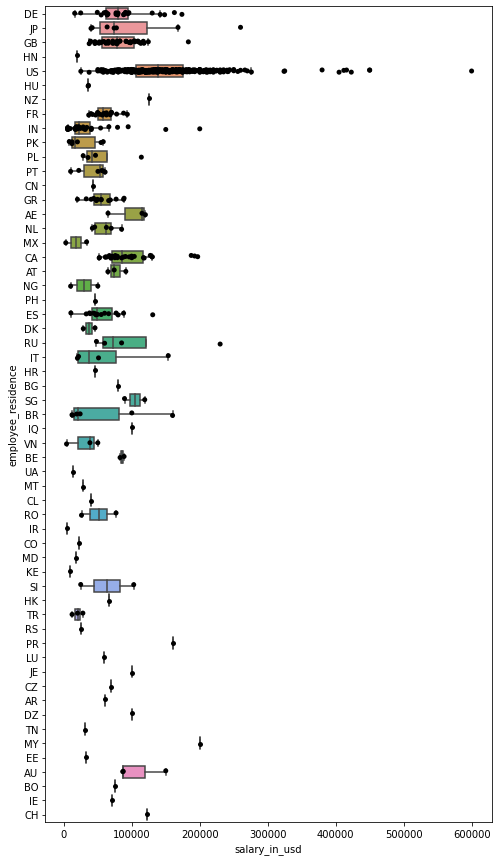

In [20]:
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='employee_residence', x='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(y='employee_residence', x='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

The U.S is highest in median and largest in variance.

* Salary piechart by remote_ratio

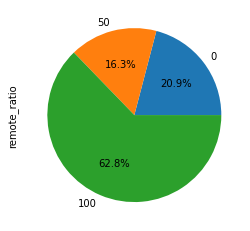

In [21]:
df.groupby('remote_ratio')['remote_ratio'].count().plot.pie(autopct="%1.1f%%");

100% remote occupies 62.8%. On the othwer hand, no remote work occupies 20.9%

* Salary boxplot by remote_ratio

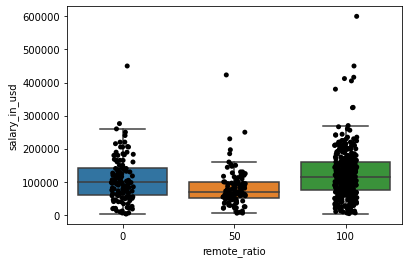

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='remote_ratio', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

Median salary of 100% remote is a little bit higher than median of no remote work.

* Salary histplot by remote_ratio

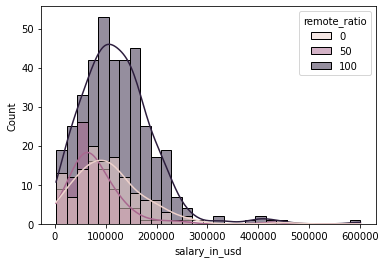

In [23]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='remote_ratio');

The trend of 3 types are right skewed.

* Salary barchart by company_location

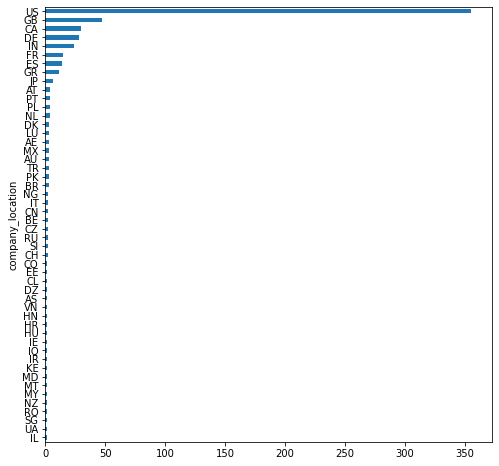

In [24]:
df.groupby('company_location')['company_location'].count().sort_values(ascending=True).plot.barh(figsize=(8,8));

The number of companies which are in the U.S is overwhelmingly.

* Salary boxplot by company_location

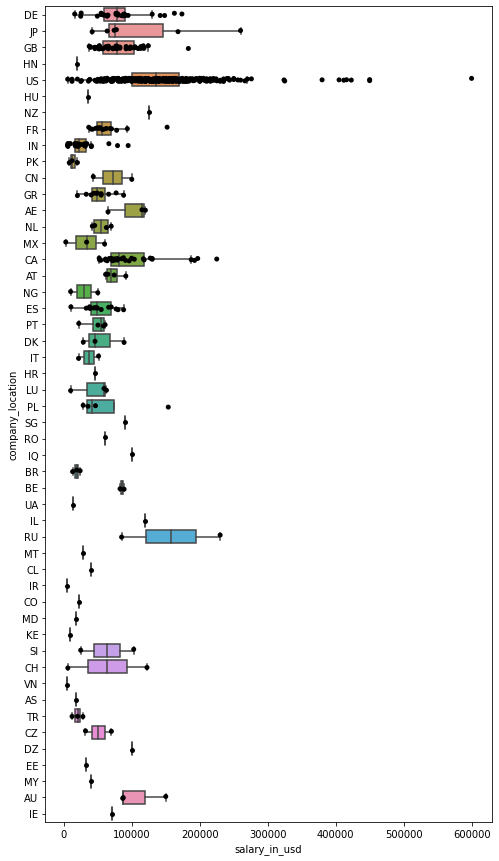

In [25]:
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='company_location', x='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(y='company_location', x='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

Russia is highest in median and the U.S is largest in variance.

* Salary piechart by company_size

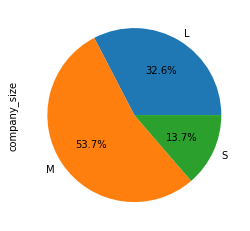

In [26]:
df.groupby('company_size')['company_size'].count().plot.pie(autopct="%1.1f%%");

Medium size companies occupy 53.7%.

* Salary boxplot by company_size

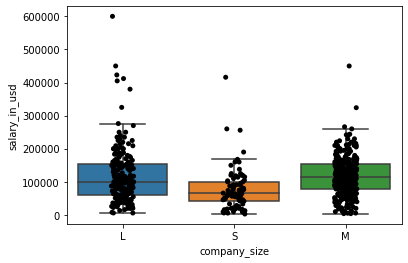

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='company_size', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='company_size', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

Large and medium size companies have same range of salary in 99%

* Salary histplot by company size

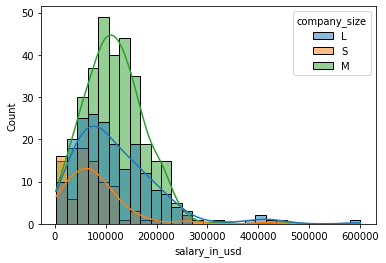

In [28]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='company_size');

The trend of 3 types are right skewed.

* Company location and employee residence

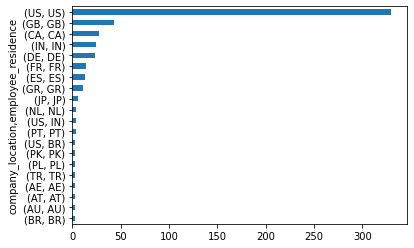

In [29]:
df.groupby(['company_location','employee_residence'])['company_location'].count().sort_values(ascending=True).tail(20).plot.barh();

Most people are working in domestic companies and most people live and are working in the U.S.

# Data Analyst, Data Engineer and Data Scientist Salary Prediction Model

* Features engineering

In [30]:
df2=df[df['job_title'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])]

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 605
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           372 non-null    int64 
 1   experience_level    372 non-null    object
 2   employment_type     372 non-null    object
 3   job_title           372 non-null    object
 4   salary              372 non-null    int64 
 5   salary_currency     372 non-null    object
 6   salary_in_usd       372 non-null    int64 
 7   employee_residence  372 non-null    object
 8   remote_ratio        372 non-null    int64 
 9   company_location    372 non-null    object
 10  company_size        372 non-null    object
dtypes: int64(4), object(7)
memory usage: 34.9+ KB


I found the outliers and dropped them.

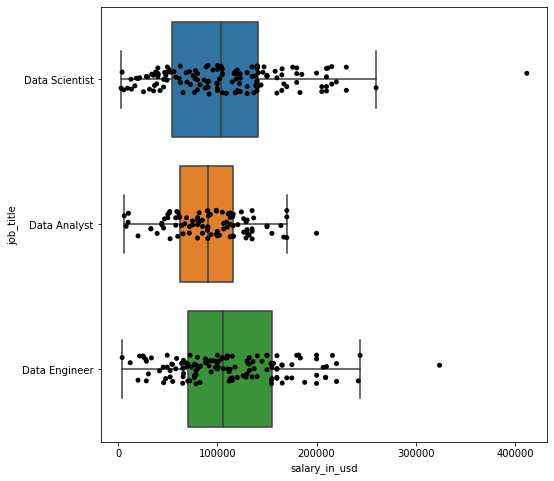

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='job_title', x='salary_in_usd', data=df2, showfliers=False, ax=ax)
sns.stripplot(y='job_title', x='salary_in_usd', data=df2, jitter=True, color='black', ax=ax)
plt.show()

This time, I dropped the data which are over $300,000 salary and I focused on full time.

In [33]:
df2=df2[df2["salary_in_usd"] <= 300000]
df2=df2[df2['employment_type']== 'FT']

I also dropped some features which are not so important.

In [34]:
df2=df2.drop(['work_year','salary_currency', 'employee_residence', 'company_location','salary','employment_type'],axis=1)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 605
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  363 non-null    object
 1   job_title         363 non-null    object
 2   salary_in_usd     363 non-null    int64 
 3   remote_ratio      363 non-null    int64 
 4   company_size      363 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.0+ KB


* Salary scatterplot by job_title and experience level

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


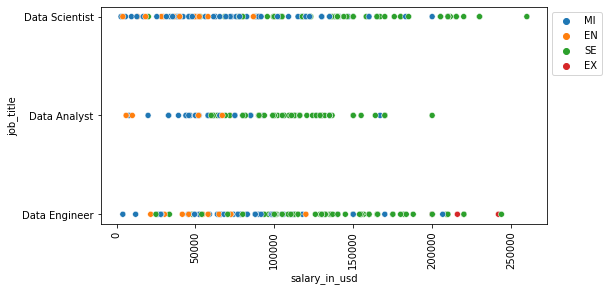

In [36]:
plt.figure(figsize=(8, 4))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df2['salary_in_usd'],y=df2['job_title'],hue=df2['experience_level'],data=df2)
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1));

* Salary scatterplot by job_title and remote_ratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


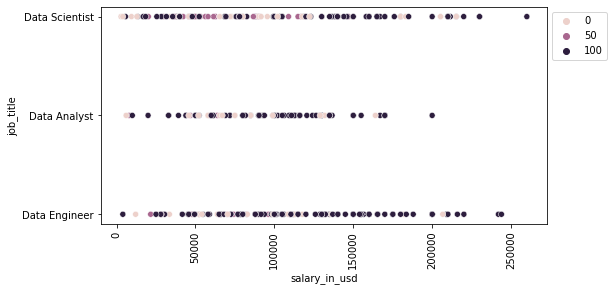

In [37]:
plt.figure(figsize=(8, 4))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df2['salary_in_usd'],y=df2['job_title'],hue=df2['remote_ratio'],data=df2)
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1));

* Salary scatterplot by job_title and company_size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


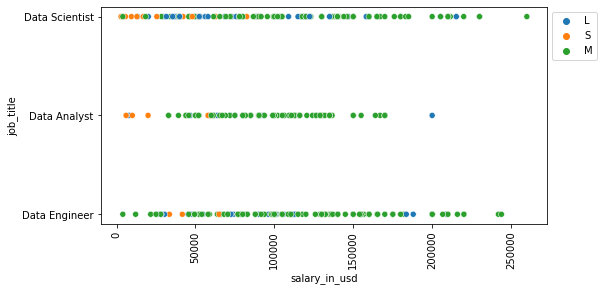

In [38]:
plt.figure(figsize=(8, 4))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df2['salary_in_usd'],y=df2['job_title'],hue=df2['company_size'],data=df2)
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1));

* Create dummy variables for a variable by get_dummies

In [39]:
df2=pd.get_dummies(df2)
df2

,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,company_size_L,company_size_M,company_size_S
0,79833,0,0,0,1,0,0,0,1,1,0,0
5,72000,100,1,0,0,0,1,0,0,1,0,0
7,35735,50,0,0,1,0,0,0,1,1,0,0
10,51321,0,1,0,0,0,0,0,1,0,0,1
11,40481,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,52000,0,1,0,0,0,1,0,0,0,1,0
602,154000,100,0,0,0,1,0,1,0,0,1,0
603,126000,100,0,0,0,1,0,1,0,0,1,0
604,129000,0,0,0,0,1,1,0,0,0,1,0


In [40]:
df2['remote_ratio']=df2['remote_ratio']/100

* Correlation heatmap

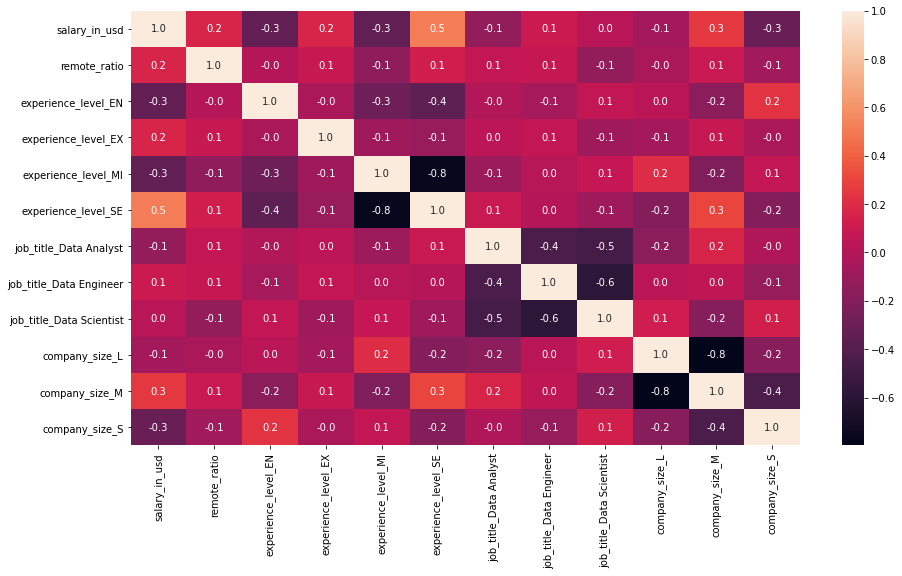

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(),annot=True, fmt="1.1f");

# Comparing Modeling

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:, 1:14], df2.iloc[:, 0],
                                                    test_size=0.2, random_state=1)

* Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(x_train, y_train)

pred_lr = lr.predict(x_test)

r2_lr = r2_score(y_test, pred_lr)

mae_lr = mean_absolute_error(y_test, pred_lr)

print("R2 : %.3f" % r2_lr)
print("MAE : %.3f" % mae_lr)

print("Coef = ", lr.coef_)

print("Intercept =", lr.intercept_)

R2 : 0.264
MAE : 33145.986
Coef =  [ 1.34747637e+04 -9.03859743e+17 -9.03859743e+17 -9.03859743e+17
 -9.03859743e+17  7.77763607e+17  7.77763607e+17  7.77763607e+17
 -1.67886506e+17 -1.67886506e+17 -1.67886506e+17]
Intercept = 2.939826430289901e+17


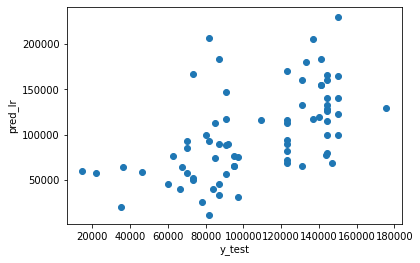

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ylabel("pred_lr")
plt.xlabel("y_test")
plt.scatter(pred_lr, y_test)

plt.show()

* Ridge

In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)

pred_ridge = ridge.predict(x_test)

r2_ridge = r2_score(y_test, pred_ridge)

mae_ridge = mean_absolute_error(y_test, pred_ridge)

print("R2 : %.3f" % r2_ridge)
print("MAE : %.3f" % mae_ridge)

print("Coef = ", ridge.coef_)

R2 : 0.291
MAE : 32240.618
Coef =  [ 12278.70035719 -32880.25157448  23252.10468529 -18269.26797332
  27897.4148625  -14160.53719647   5551.82082446   8608.71637201
   7246.10235738  13329.46968776 -20575.57204514]


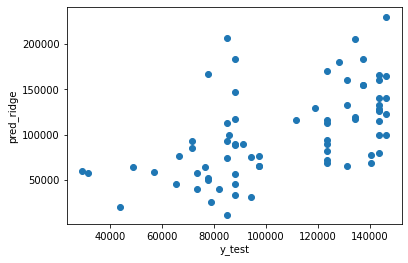

In [46]:
plt.ylabel("pred_ridge")
plt.xlabel("y_test")
plt.scatter(pred_ridge, y_test)

plt.show()

* Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)

pred_RF = RF.predict(x_test)

r2_RF = r2_score(y_test, pred_RF)

mae_RF = mean_absolute_error(y_test, pred_RF)

print("R2 : %.3f" % r2_RF)
print("MAE : %.3f" % mae_RF)

print("feature_importances = ", RF.feature_importances_)

R2 : 0.269
MAE : 31828.117
feature_importances =  [0.14114534 0.03111304 0.09329405 0.02184626 0.42034331 0.07834587
 0.02598718 0.0456546  0.03311938 0.03204233 0.07710864]


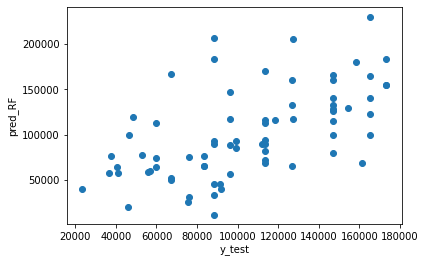

In [48]:
plt.ylabel("pred_RF")
plt.xlabel("y_test")
plt.scatter(pred_RF, y_test)

plt.show()

* Grandien Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

GBDT = GradientBoostingRegressor()
GBDT.fit(x_train, y_train)

pred_GBDT = GBDT.predict(x_test)

r2_GBDT = r2_score(y_test, pred_GBDT)

mae_GBDT = mean_absolute_error(y_test, pred_GBDT)

print("R2 : %.3f" % r2_GBDT)
print("MAE : %.3f" % mae_GBDT)

print("feature_importances = ", GBDT.feature_importances_)

R2 : 0.285
MAE : 32055.108
feature_importances =  [0.11095028 0.04876561 0.1042554  0.0203419  0.45763526 0.08220522
 0.00881789 0.05159151 0.02251798 0.00328136 0.0896376 ]


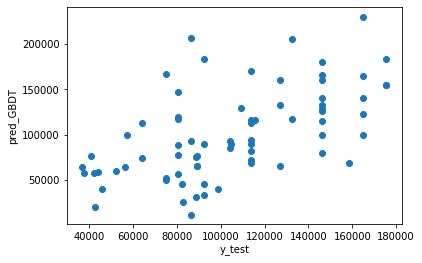

In [50]:
plt.ylabel("pred_GBDT")
plt.xlabel("y_test")
plt.scatter(pred_GBDT, y_test)

plt.show()

* Support Vector Regression

In [51]:
from sklearn.svm import SVR

SVR = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto')
SVR.fit(x_train, y_train)

pred_SVR = SVR.predict(x_test)

r2_SVR = r2_score(y_test, pred_SVR)

mae_SVR = mean_absolute_error(y_test, pred_SVR)

print("R2 : %.3f" % r2_SVR)
print("MAE : %.3f" % mae_SVR)

print("Coef = ", SVR.coef_)

R2 : -0.002
MAE : 40603.041
Coef =  [[ 22. -32.   4. -38.  66. -10.   5.   5.  -9.  34. -25.]]


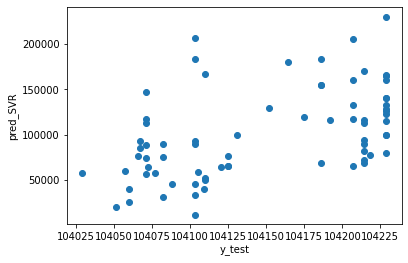

In [52]:
plt.ylabel("pred_SVR")
plt.xlabel("y_test")
plt.scatter(pred_SVR, y_test)

plt.show()